In [19]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [20]:
from scripts.utils import data_path, set_mpl
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import astropy.io.fits as fits
import healpy as hp
import nway_python_api as nway
%matplotlib inline

# Nway run in distnce + protometric priors learned from the DESIxCSC data

In [22]:
ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits', )
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits',)
magnitude_columns = [('nnprior', '../1_csc-desi-photo-prior/model/nn-prior.csv'),
                    ('mag_g', '../1_csc-desi-photo-prior/model/mag_g.csv'),
                    ('mag_r', '../1_csc-desi-photo-prior/model/mag_r.csv'),
                    ('mag_z', '../1_csc-desi-photo-prior/model/mag_z.csv'),
                    ('mag_w1', '../1_csc-desi-photo-prior/model/mag_w1.csv'),
                    ('mag_w2', '../1_csc-desi-photo-prior/model/mag_w2.csv'),
                    ('col_gr', '../1_csc-desi-photo-prior/model/col_gr.csv'),
                    ('col_rz', '../1_csc-desi-photo-prior/model/col_rz.csv'),
                    ('col_zw1', '../1_csc-desi-photo-prior/model/col_zw1.csv'),
                    ('col_rw2', '../1_csc-desi-photo-prior/model/col_rw2.csv')]


desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)

    adding angular separation columns
matching:  78684 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:02<00:00, 3253.49it/s]
Incorporating bias "DESI:nnprior" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnprior"


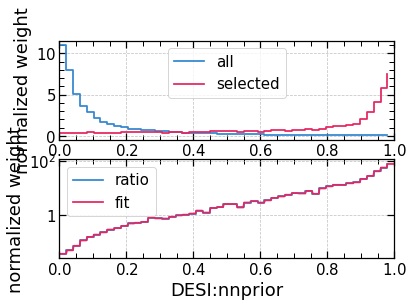

Incorporating bias "DESI:mag_g" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_g"


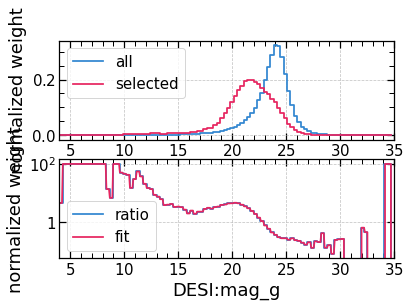

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:375: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:mag_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_r"


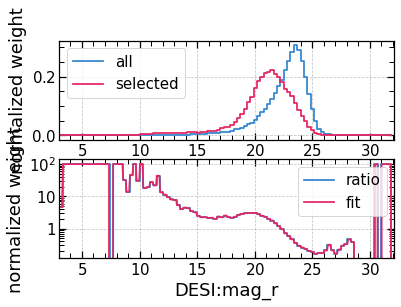

Incorporating bias "DESI:mag_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_z"


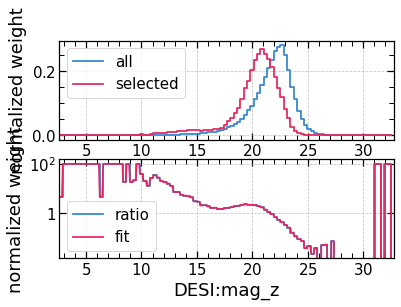

Incorporating bias "DESI:mag_w1" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_w1"


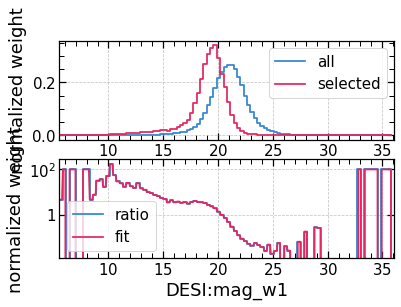

Incorporating bias "DESI:mag_w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_w2"


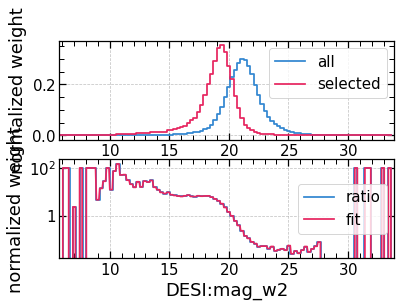

Incorporating bias "DESI:col_gr" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_gr"


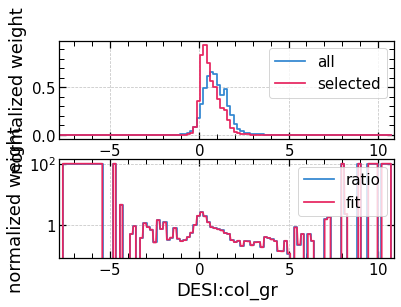

Incorporating bias "DESI:col_rz" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_rz"


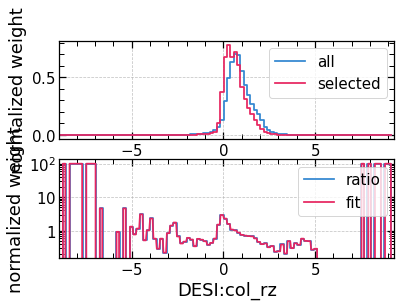

Incorporating bias "DESI:col_zw1" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_zw1"


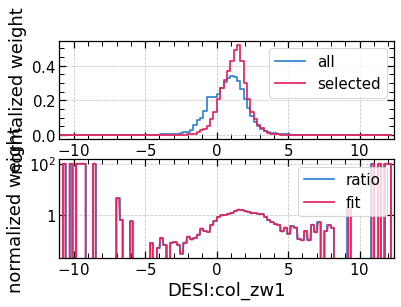

Incorporating bias "DESI:col_rw2" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_rw2"


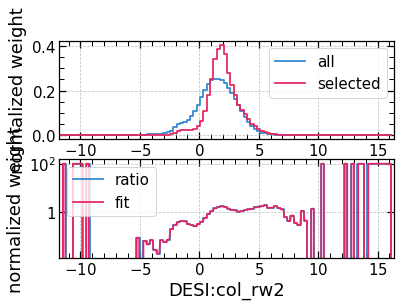


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
    adding angular separation columns
matching:  54727 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 3341.96it/s]
Incorporating bias "DESI:nnprior" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnprior"


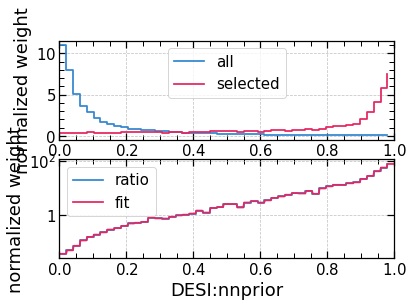

Incorporating bias "DESI:mag_g" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_g"


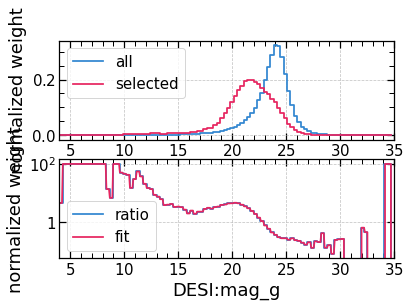

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:375: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:mag_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_r"


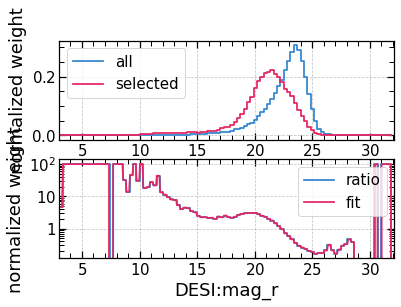

Incorporating bias "DESI:mag_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_z"


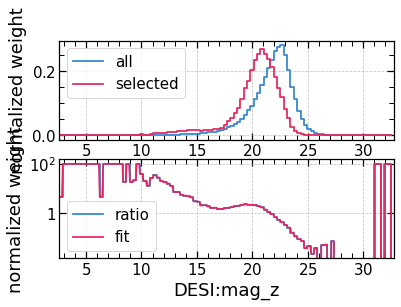

Incorporating bias "DESI:mag_w1" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_w1"


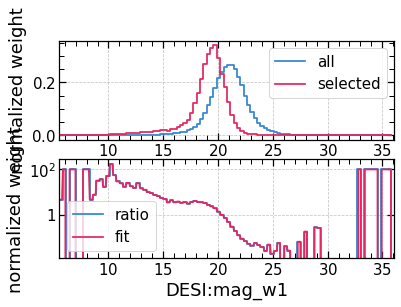

Incorporating bias "DESI:mag_w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_mag_w2"


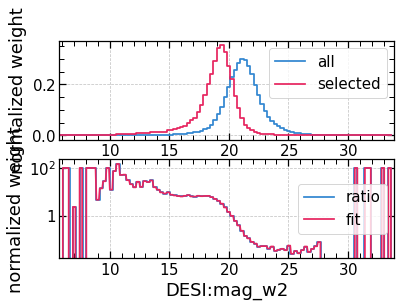

Incorporating bias "DESI:col_gr" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_gr"


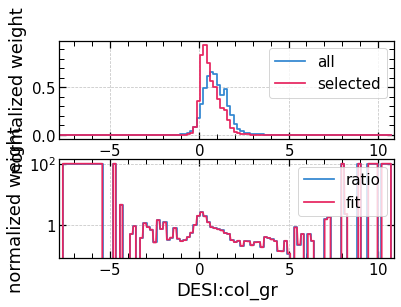

Incorporating bias "DESI:col_rz" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_rz"


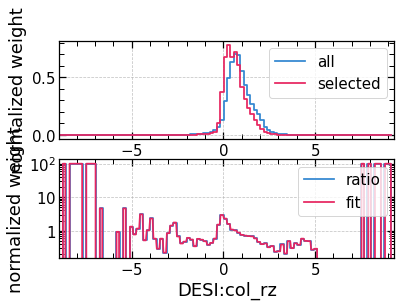

Incorporating bias "DESI:col_zw1" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_zw1"


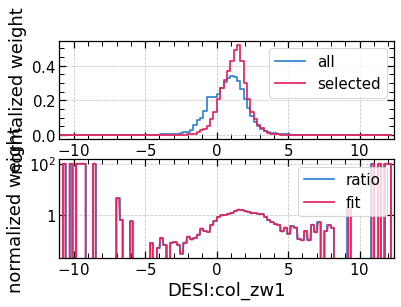

Incorporating bias "DESI:col_rw2" ...
magnitude histogramming: using user-supplied histogram for "DESI_col_rw2"


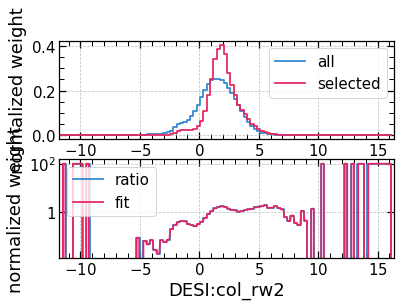


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:420: RuntimeWarning: invalid value encountered in subtract
  bfsum1 = log10((10**(values[1:] - offset)).sum()) + offset


In [23]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
match_radius = 20,
prior_completeness = 1,
mag_include_radius = 3.0,
store_mag_hists = True

)

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
match_radius = 20,
prior_completeness = 1,
mag_include_radius = 3.0,
store_mag_hists = True
)

In [24]:
nway_res_ero.head(2)

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnprior,bias_DESI_mag_g,...,bias_DESI_mag_w1,bias_DESI_mag_w2,bias_DESI_col_gr,bias_DESI_col_rz,bias_DESI_col_zw1,bias_DESI_col_rw2,p_single,match_flag,prob_has_match,prob_this_match
0,0,-1,NaN,0.000000,1,0.000000,0.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0,1.0,0.0
1,0,10477,0.042512,0.042512,2,10.841974,10.841974,0.96674,75.015815,2.013747,...,6.572613,9.417132,2.004841,1.077465,1.250886,1.646857,1.0,1,1.0,1.0



For a false detection rate of <1%
--> use only counterparts with p_any>1.00 (0.00% of matches)

For a false detection rate of <3%
--> use only counterparts with p_any>1.00 (0.00% of matches)

For a false detection rate of <5%
--> use only counterparts with p_any>0.99 (54.98% of matches)

For a false detection rate of <10%
--> use only counterparts with p_any>0.94 (65.92% of matches)
The efficiency is 79.11%
The purity is  79.05%


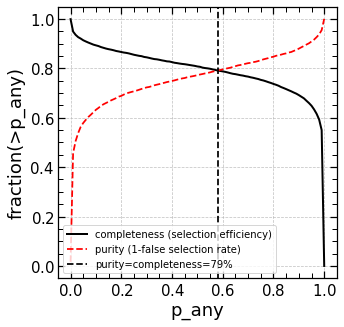

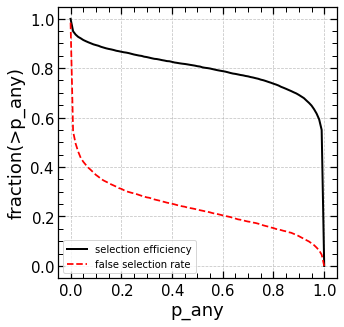

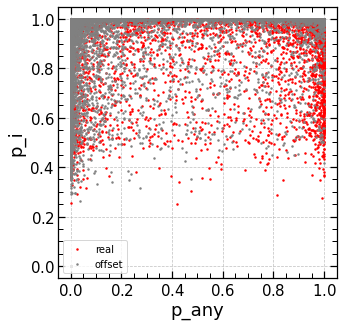

In [25]:
nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)

In [26]:
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero_random.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])

<AxesSubplot:>

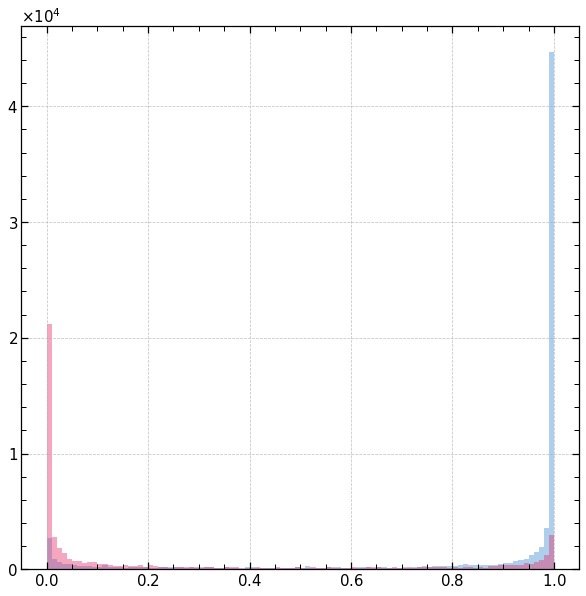

In [27]:
plt.figure(figsize=(10,10))
nway_res_ero.prob_has_match.hist(bins=100, alpha = 0.4)
nway_res_ero_random.prob_has_match.hist(bins=100, alpha = 0.4)

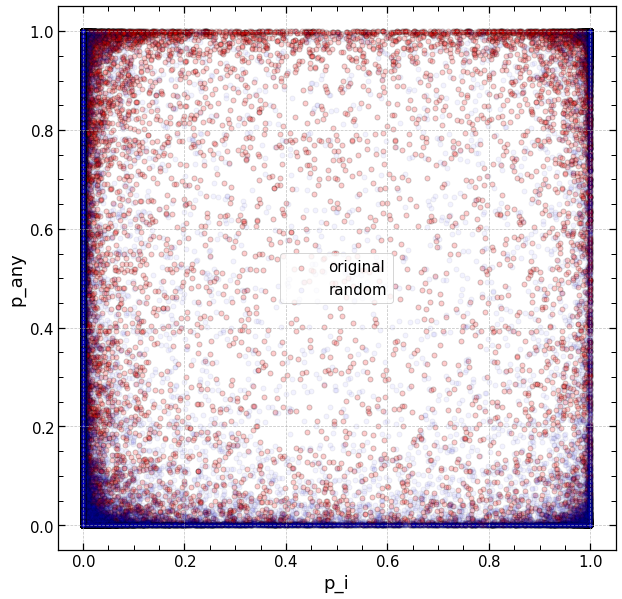

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(nway_res_ero.prob_this_match, nway_res_ero.prob_has_match, alpha = 0.2, c = 'red', label = 'original')
plt.scatter(nway_res_ero_random.prob_this_match, nway_res_ero_random.prob_has_match, alpha = 0.05, c = 'blue', label = 'random')
plt.xlabel('p_i')
plt.ylabel('p_any')
plt.legend()